In [600]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [601]:
#Reading CSV file
df=pd.read_csv(r'C:\Users\Rahul Airan\Desktop\Skill Development\Project\Diabetes-Prediction-using-AI\diabetes.csv')

In [602]:
# Show first five observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [603]:
# Returning dimensions of dataframe
df.shape

(768, 9)

In [604]:
# Get Summary of Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [605]:
# Check all DUPLICATE RECORDS from the DATAFRAME and remove them
df.drop_duplicates(inplace=True)
df.shape

(768, 9)

As the no of rows remain unchanged after duplicate rows are removed hence no duplicate records found

In [606]:
# Returning no. of missing values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No Missing Values in any column of Dataframe

In [607]:
# Get Statistics of Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [608]:
df['Outcome'].value_counts() # For checking types of outcomes and there number 

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

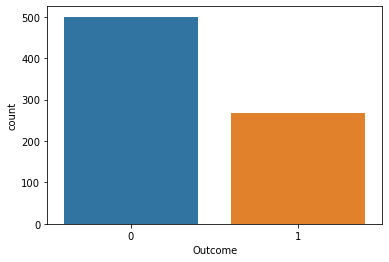

In [609]:
sns.countplot(x='Outcome',data=df) #  visualization of Outcome column

<AxesSubplot:>

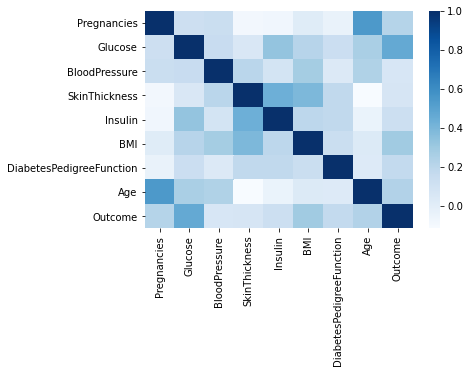

In [610]:
#Data Visualization
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues') 

<AxesSubplot:>

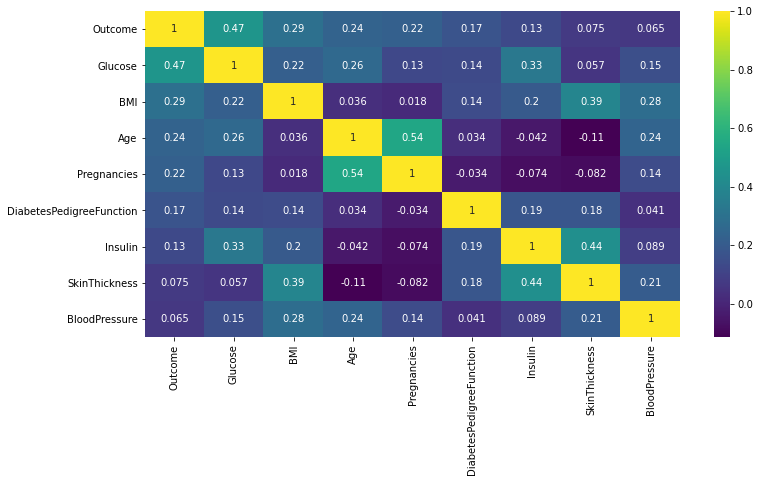

In [611]:
#Outcome Correlation Matrix for Multicollinearity checking
k = 9 #number of variables for heatmap/ no of colums in dataframe 
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

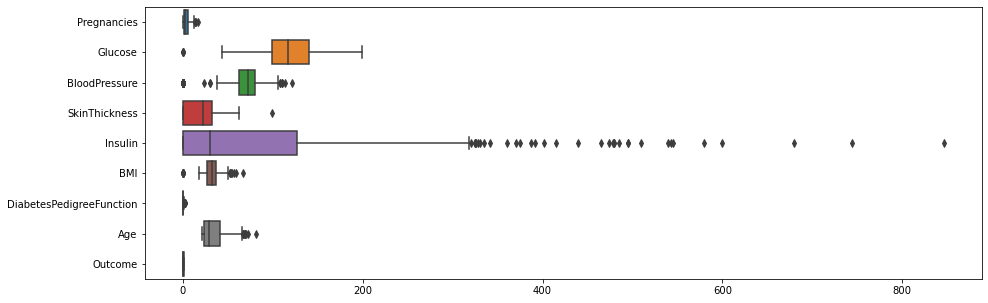

In [612]:
# Data Visualization for Outlier checking
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [613]:
# sns.scatterplot(x=df['Insulin'],y=df['Outcome']) #Valid Outlier
# plt.show()

C:\Users\Rahul Airan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul Airan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rahul Airan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

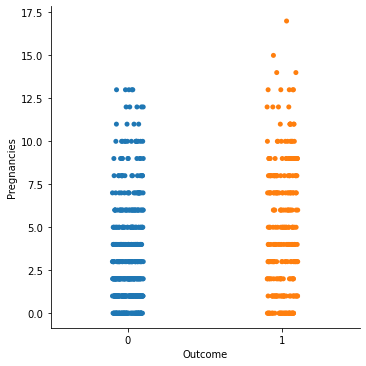

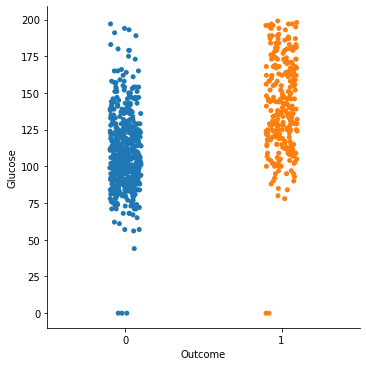

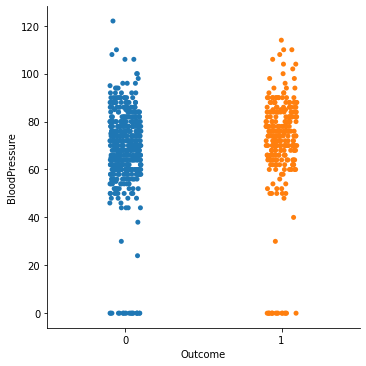

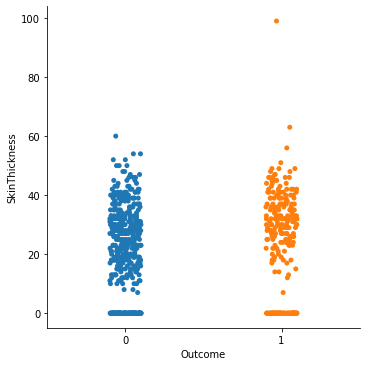

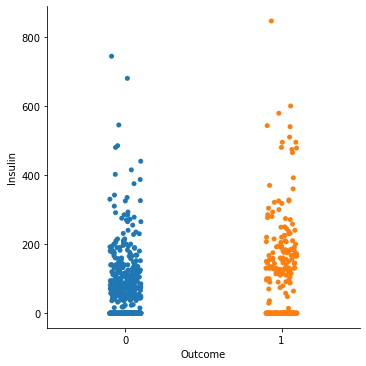

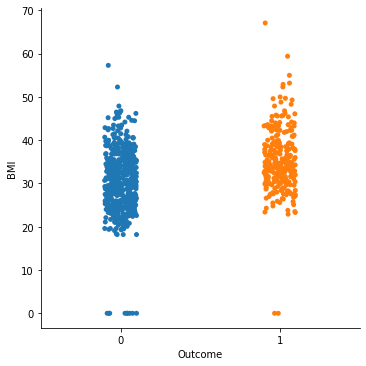

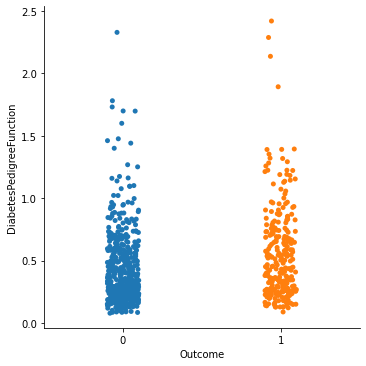

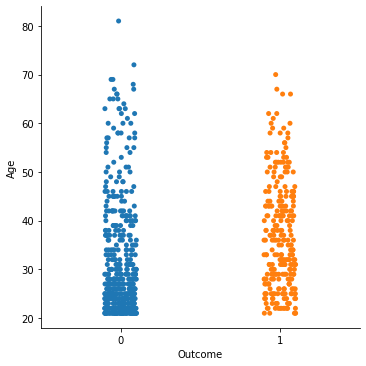

In [614]:
#For Checking Valid Outliers
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)


The values of Insulin , Glucose , Blood Pressure, Skin Thickness, BMI can't be 0 in real world so we have to remove the inappropriate data

From the Visualization we can see BloodPressure , Skin Thickness , Glucose , Skin Thickness , BMI and and Insulin have valid outliers regarding to the real world scenarios and so we don't need to handle them 

From the Visualization we can also see the Pregnancies having invalid outliers w.r.t. the real world scenarios so we need to do data precosseing to handle inappropriate data

# Data Preprocessing

# Handling Inappropriate data of 0 in Columns

In [615]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


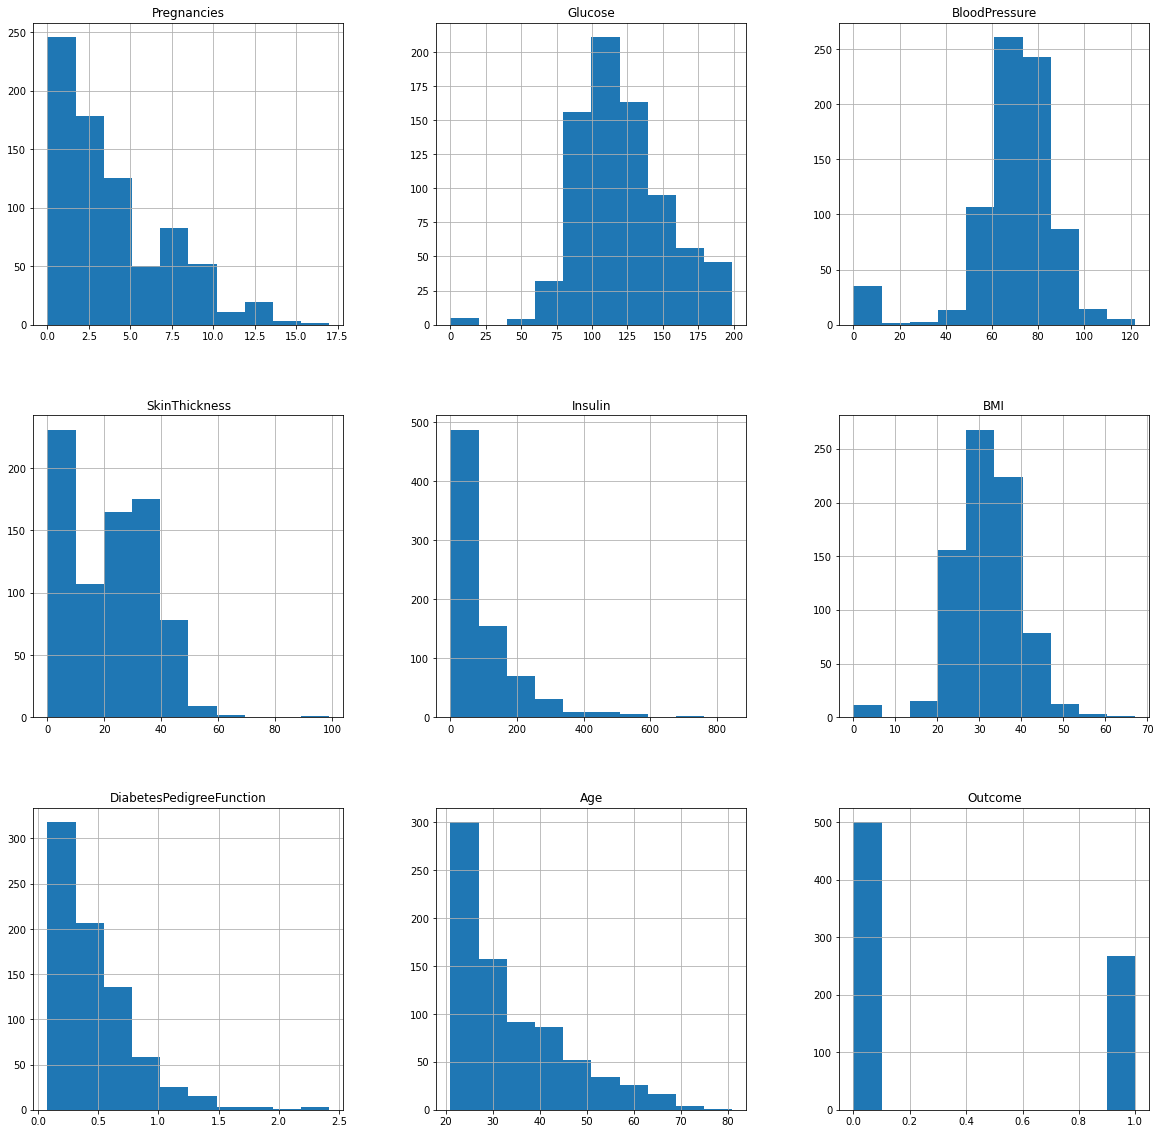

In [616]:
# Data Visualization to understand Data Distribution Before filling NaN values 
p = df.hist(figsize = (20,20))

In [617]:
#Replacing 0 by Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [618]:
# Again, getting no. of missing values in each column 

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Rules to Handle Missing Data--

Statistical Prespective Rules

a. Numerical Columns
       
       Continous Data column: Replace the Missing data with the MEAN value of the column
       
       Discrete Data column: Replace the Missing data with the MEDIAN value of the column

b. Non-Numerical Columns:
       
       Replace The missing data with the Mode Value of the column

In [619]:
#Filling Nan Values by Performing Data Imputation

df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [620]:
# Checking if missing values in each column is replaced

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

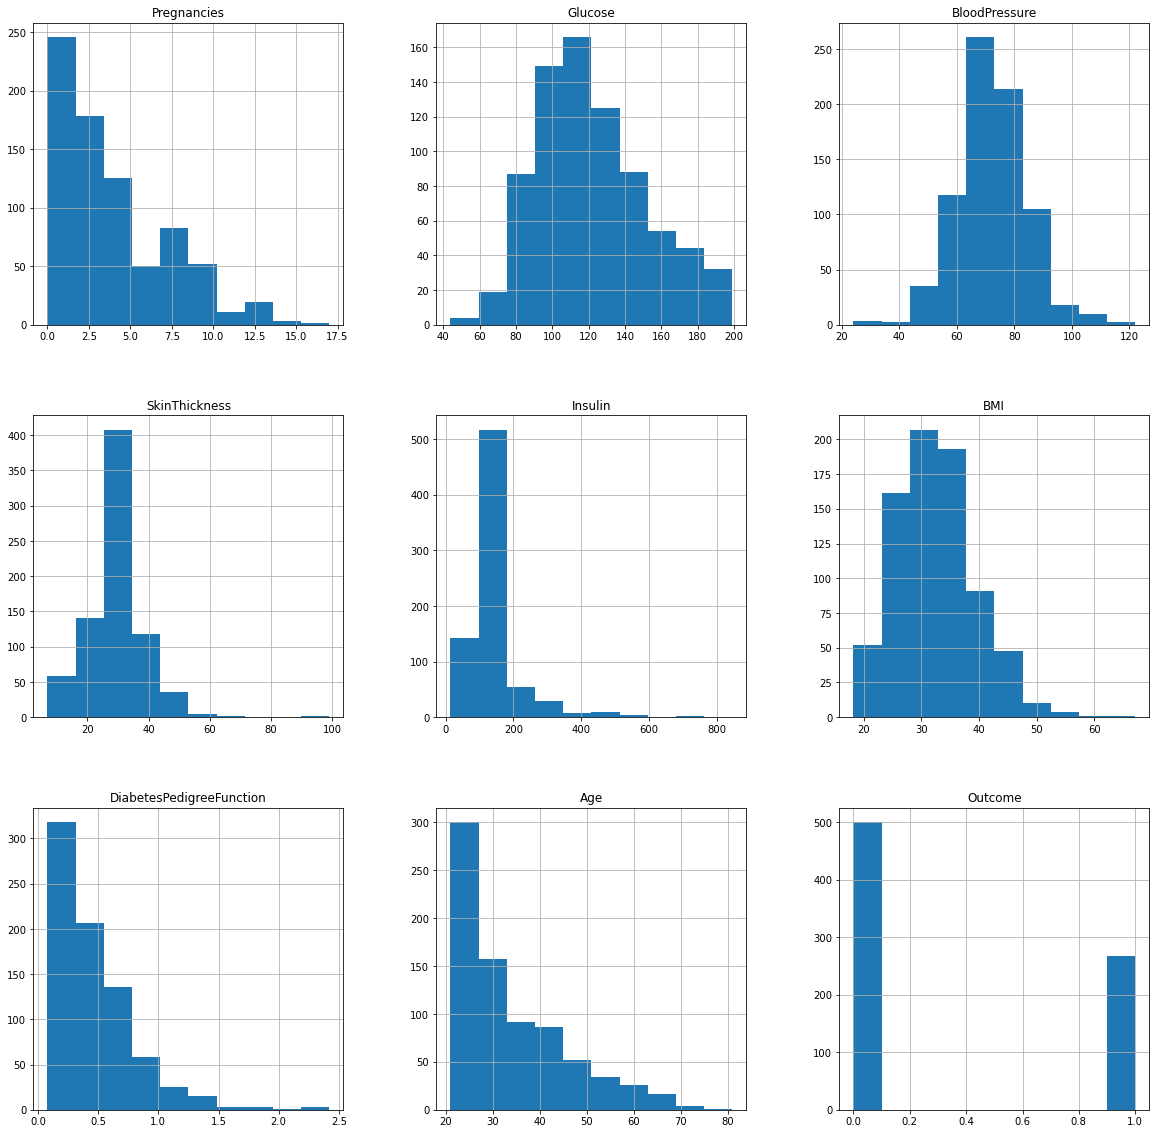

In [621]:
# Data Visualization after Nan Removal
p = df.hist(figsize = (20,20))

In [622]:
#Checking Summary of data after replacing inappropriate zero values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


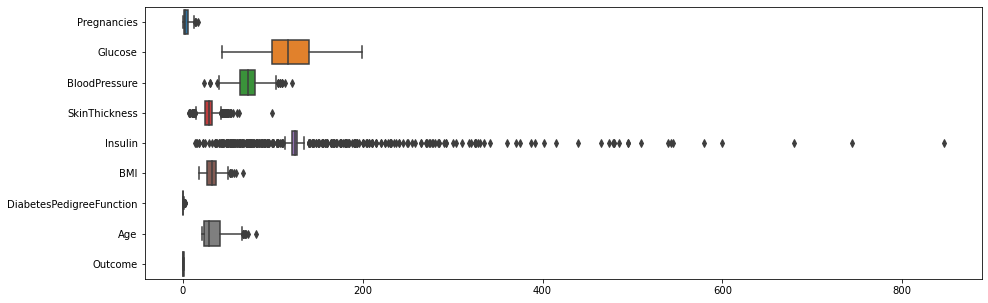

In [623]:
# Data Visualization for Outlier checking
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.show()

Pregnancies Column Outlier removal left

## REMOVINIG OUTLIERS

In [624]:
Q1 = np.percentile(df['Pregnancies'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['Pregnancies'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
Q3

6.0

In [625]:
# Above Upper bound
upper = df['Pregnancies'] >= (Q3+1.5*IQR)
print(np.where(upper))
  

(array([ 88, 159, 298, 455], dtype=int64),)


In [626]:
df["Pregnancies"] = np.where(df["Pregnancies"]>Q3, df['Pregnancies'].mean(),df['Pregnancies'])

In [627]:
# Data Summary After Outlier Removal
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2.698976,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,1.783267,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,3.845052,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,6.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Splitting of data for training and testing

In [628]:
# Defining Features of Data
X=df.drop('Outcome',axis=1)

In [629]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2.698976,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885
std,1.783267,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000
75%,3.845052,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,6.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [630]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1.000000,85.0,66.0,29.0,125.0,26.6,0.351,31
2,3.845052,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1.000000,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.000000,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,3.845052,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.000000,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5.000000,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.000000,126.0,60.0,29.0,125.0,30.1,0.349,47


In [631]:
# Defining Target Variable of Data
Y=df['Outcome']

In [632]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [633]:
# Importing Libraries for train test split
from sklearn.model_selection import train_test_split

In [634]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.20,random_state=101) # Train data set 80% and test data set 20%

In [635]:
X_train # feature train data set 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
709,2.000000,93.0,64.0,32.0,160.0,38.0,0.674,23
425,4.000000,184.0,78.0,39.0,277.0,37.0,0.264,31
135,2.000000,125.0,60.0,20.0,140.0,33.8,0.088,31
630,3.845052,114.0,64.0,29.0,125.0,27.4,0.732,34
500,2.000000,117.0,90.0,19.0,71.0,25.2,0.313,21
...,...,...,...,...,...,...,...,...
75,1.000000,117.0,48.0,20.0,125.0,24.7,0.140,22
599,1.000000,109.0,38.0,18.0,120.0,23.1,0.407,26
575,1.000000,119.0,44.0,47.0,63.0,35.5,0.280,25
337,5.000000,115.0,76.0,29.0,125.0,31.2,0.343,44


In [636]:
Y_train # target value train data set

709    1
425    1
135    0
630    1
500    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 614, dtype: int64

# Feature Scaling

Features not in same scale so we put it in same scale to optimise training time

# Standard Scalar

In [637]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [638]:
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [639]:
X_train

array([[-0.37171942, -0.94207104, -0.6869385 , ...,  0.77557921,
         0.62083528, -0.86196915],
       [ 0.74790139,  2.06732107,  0.46749421, ...,  0.63166002,
        -0.64915711, -0.19012014],
       [-0.37171942,  0.11617673, -1.01677641, ...,  0.17111859,
        -1.19432458, -0.19012014],
       ...,
       [-0.93152983, -0.08224472, -2.33612808, ...,  0.41578122,
        -0.59959643, -0.6940069 ],
       [ 1.3077118 , -0.2145257 ,  0.30257526, ..., -0.20307133,
        -0.40445126,  0.9016345 ],
       [ 0.66115994,  0.28152795, -0.19218162, ...,  0.22868627,
         0.55268935,  0.98561563]])

In [640]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train= scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train our Model

# Logistic Regression

In [641]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [642]:
lr.fit(X_train,Y_train) # Model is being made wrt the values of training data

LogisticRegression()

In [643]:
Y_pred=lr.predict(X_test) # Predicting values of Y

In [644]:
Y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [645]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
603    1
510    1
171    1
672    0
298    1
Name: Outcome, Length: 154, dtype: int64

In [646]:
# Calculating Accuracy Score
from sklearn.metrics import accuracy_score 

In [647]:
accuracy_score(Y_test,Y_pred) * 100

79.22077922077922

In [648]:
# Calculating mean square error
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(Y_test, Y_pred)*100)

20.77922077922078


In [649]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred)) # Computing Classification Report

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.73      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [650]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [651]:
# Computing confusion matrix
pd.crosstab(Y_test,Y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,92,11,103
1,21,30,51
All,113,41,154


Text(33.0, 0.5, 'Actual Label')

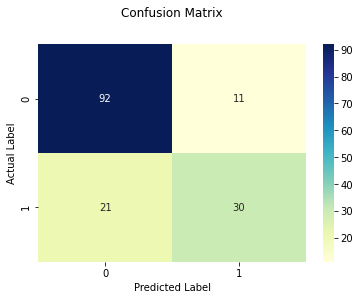

In [652]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(Y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Decision Tree

In [653]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [654]:
dt.fit(X_train,Y_train) # Model is being made wrt the values of training data

DecisionTreeClassifier()

In [655]:
Y_pred=dt.predict(X_test) # Predicting values of Y

In [656]:
Y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [657]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
603    1
510    1
171    1
672    0
298    1
Name: Outcome, Length: 154, dtype: int64

In [658]:
# Calculating Accuracy Score
accuracy_score(Y_test,Y_pred)*100

75.97402597402598

In [659]:
# Calculating mean square error
print(mean_squared_error(Y_test, Y_pred)*100)

24.025974025974026


In [660]:
print(classification_report(Y_test,Y_pred)) # Computing Classification Report

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       103
           1       0.62      0.73      0.67        51

    accuracy                           0.76       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [661]:
# Computing confusion matrix
pd.crosstab(Y_test,Y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,80,23,103
1,14,37,51
All,94,60,154


Text(33.0, 0.5, 'Actual Label')

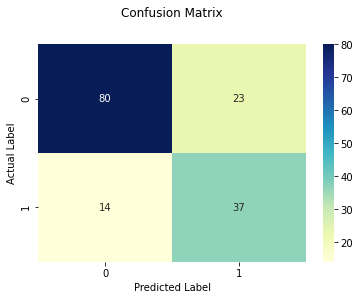

In [662]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(Y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Random Forest Classifier

In [663]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, Y_train) # Model is being made wrt the values of training data

RandomForestClassifier(n_estimators=1000)

In [664]:
Y_pred=model.predict(X_test) # Predicting values of Y

In [665]:
# Calculating Accuracy Score
accuracy_score(Y_test,Y_pred)*100

75.32467532467533

In [666]:
# Calculating mean square error
print(mean_squared_error(Y_test, Y_pred)*100)

24.675324675324674


In [667]:
print(classification_report(Y_test,Y_pred)) # Computing Classification Report

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       103
           1       0.65      0.55      0.60        51

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.75      0.75       154



In [668]:
# Computing confusion matrix
pd.crosstab(Y_test,Y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,88,15,103
1,23,28,51
All,111,43,154


Text(33.0, 0.5, 'Actual Label')

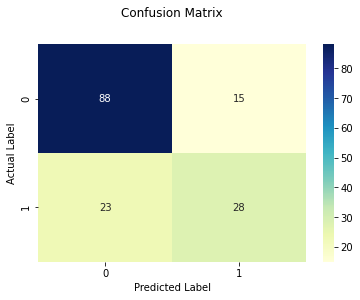

In [669]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(Y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Gradient Boosting Classifier

In [670]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, Y_train)

#prediction
Y_pred = model.predict(X_test)

# Calculating Accuracy Score
accuracy_score(Y_test,Y_pred)*100

74.67532467532467

In [671]:
# Calculating mean square error
print(mean_squared_error(Y_test, Y_pred)*100)

25.324675324675322


In [672]:
print(classification_report(Y_test,Y_pred)) # Computing Classification Report

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       103
           1       0.62      0.61      0.61        51

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



In [673]:
# Computing confusion matrix
pd.crosstab(Y_test,Y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,84,19,103
1,20,31,51
All,104,50,154


Text(33.0, 0.5, 'Actual Label')

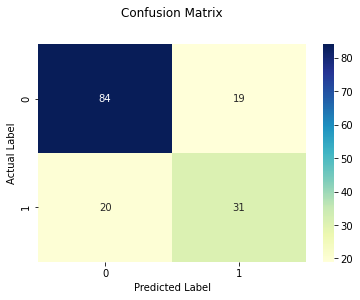

In [674]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(Y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# XGBClassifier

In [675]:
#!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)  # Model is being made wrt the values of training data
Y_pred = model.predict(X_test)  # Predicting values of Y

# Calculating Accuracy Score
accuracy_score(Y_test,Y_pred)*100

C:\Users\Rahul Airan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Rahul Airan\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[15:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


74.02597402597402

In [676]:
# Calculating mean square error
print(mean_squared_error(Y_test, Y_pred)*100)

25.97402597402597


In [677]:
print(classification_report(Y_test,Y_pred)) # Computing Classification Report

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       103
           1       0.61      0.61      0.61        51

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [678]:
# Computing confusion matrix
pd.crosstab(Y_test,Y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,83,20,103
1,20,31,51
All,103,51,154


Text(33.0, 0.5, 'Actual Label')

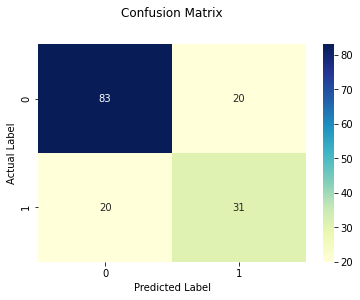

In [679]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(Y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# KNeighbourClassifier

In [680]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors  import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
clf = knn.fit(X_train, Y_train)  # Model is being made wrt the values of training data
Y_pred = clf.predict(X_test)  # Predicting values of Y

# Calculating Accuracy Score
accuracy_score(Y_test,Y_pred)*100

76.62337662337663

In [681]:
# Calculating mean square error
print(mean_squared_error(Y_test, Y_pred)*100)

23.376623376623375


In [682]:
print(classification_report(Y_test,Y_pred)) # Computing Classification Report

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       103
           1       0.69      0.53      0.60        51

    accuracy                           0.77       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [683]:
pd.crosstab(Y_test,Y_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,91,12,103
1,24,27,51
All,115,39,154


Text(33.0, 0.5, 'Actual Label')

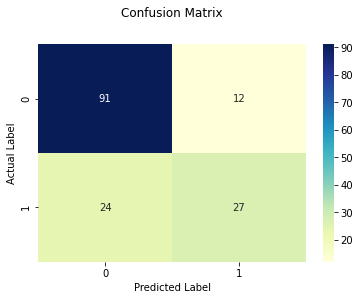

In [684]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(Y_test,Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')